<a href="https://colab.research.google.com/github/BriouaNorElHouda/py/blob/main/landv3_4_(1)NICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import requests
import os
import io
import cv2
import shutil
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Conv2D , MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.losses import CategoricalCrossentropy
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
labels = {
    'AnnualCrop': 0,
    'Forest': 1,
    'HerbaceousVegetation': 2,
    'Highway': 3,
    'Industrial': 4,
    'Pasture': 5,
    'PermanentCrop': 6,
    'Residential': 7,
    'River': 8,
    'SeaLake': 9,
}

In [ ]:
zip_path = '/content/drive/MyDrive/EuroSatDS.zip'

extracted_path = "/content/EuroSatDS"
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extracted_path)

data = []

src_path = os.path.join(extracted_path, "EuroSatDS")
subclass = sorted(os.listdir(src_path))

def create_data():
    for sclass in subclass:
        path = os.path.join(src_path, sclass)
        class_num = subclass.index(sclass)
        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            new_array = cv2.resize(img_array, (64, 64))
            data.append([new_array, class_num])

create_data()

print("Total samples in the dataset:", len(data))

100%|██████████| 2500/2500 [00:00<00:00, 5522.51it/s]

Total samples in the dataset: 22000


In [ ]:

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class MyDataGenerator(keras.utils.Sequence):
    def __init__(self, X, y, batch_size):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.num_samples = len(X)

    def __len__(self):
        return int(np.ceil(self.num_samples / self.batch_size))

    def __getitem__(self, index):
        start = index * self.batch_size
        end = min((index + 1) * self.batch_size, self.num_samples)

        batch_X = self.X[start:end]
        batch_y = self.y[start:end]

        batch_X = np.array(batch_X).reshape(-1,64, 64, 3) / 255.0
        batch_y = np.array(batch_y)

        return batch_X, batch_y

batch_size = 32
train_generator = MyDataGenerator(X_train, y_train, batch_size)
test_generator = MyDataGenerator(X_test, y_test, batch_size)


In [ ]:
NAME="M3042"

model=Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),  activation='relu',  input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

tensorboard= TensorBoard(log_dir="logs\{}".format(NAME))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])


history = model.fit(train_generator, epochs=100,batch_size=32, validation_data=test_generator,callbacks=[tensorboard])

In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/MyModels/CNN145.h5'
model.save(save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
ResNet = keras.applications.ResNet50(include_top=False,
    input_shape=(64, 64, 3))

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
NAME="RN36"

model=Sequential()

model.add(ResNet)


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

tensorboard= TensorBoard(log_dir="logs\{}".format(NAME))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics=['accuracy'])


history = model.fit(train_generator, epochs=100,batch_size=32, validation_data=test_generator,callbacks=[tensorboard])

Epoch 1/100
550/550 [==============================] - 76s 68ms/step - loss: 1.4708 - accuracy: 0.5860 - val_loss: 16.0273 - val_accuracy: 0.1136
Epoch 2/100
550/550 [==============================] - 37s 66ms/step - loss: 0.4454 - accuracy: 0.8599 - val_loss: 0.6546 - val_accuracy: 0.8084
Epoch 3/100
550/550 [==============================] - 37s 67ms/step - loss: 0.2226 - accuracy: 0.9249 - val_loss: 0.3168 - val_accuracy: 0.9130
Epoch 4/100
550/550 [==============================] - 37s 66ms/step - loss: 0.1173 - accuracy: 0.9620 - val_loss: 0.2840 - val_accuracy: 0.9227
Epoch 5/100
550/550 [==============================] - 37s 67ms/step - loss: 0.0719 - accuracy: 0.9777 - val_loss: 0.2967 - val_accuracy: 0.9245
Epoch 6/100
550/550 [==============================] - 37s 67ms/step - loss: 0.0447 - accuracy: 0.9868 - val_loss: 0.2877 - val_accuracy: 0.9270
Epoch 7/100
550/550 [==============================] - 37s 67ms/step - loss: 0.0292 - accuracy: 0.9916 - val_loss: 0.2873 - val_a

In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/MyModels/RN36.h5'
model.save(save_path)

In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/MyModels/model.h5'
model.save(save_path)

In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/MyModels/RN155.h5'
model = tf.keras.models.load_model(save_path)

In [ ]:
#Plot Model Loss
plt.subplot(211)
plt.title('Model Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training','Validation'],loc='upper right')


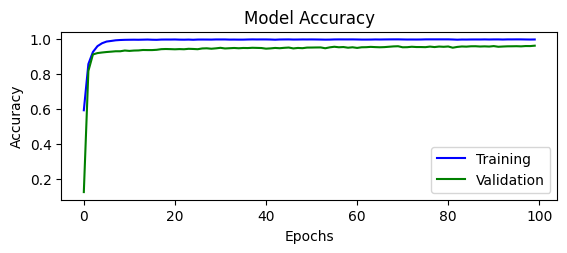

In [ ]:

# Plot Accuracy
plt.subplot(211)
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training','Validation'],loc='lower right')

In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/MyModels/CNN75.h5'
model.save(save_path)


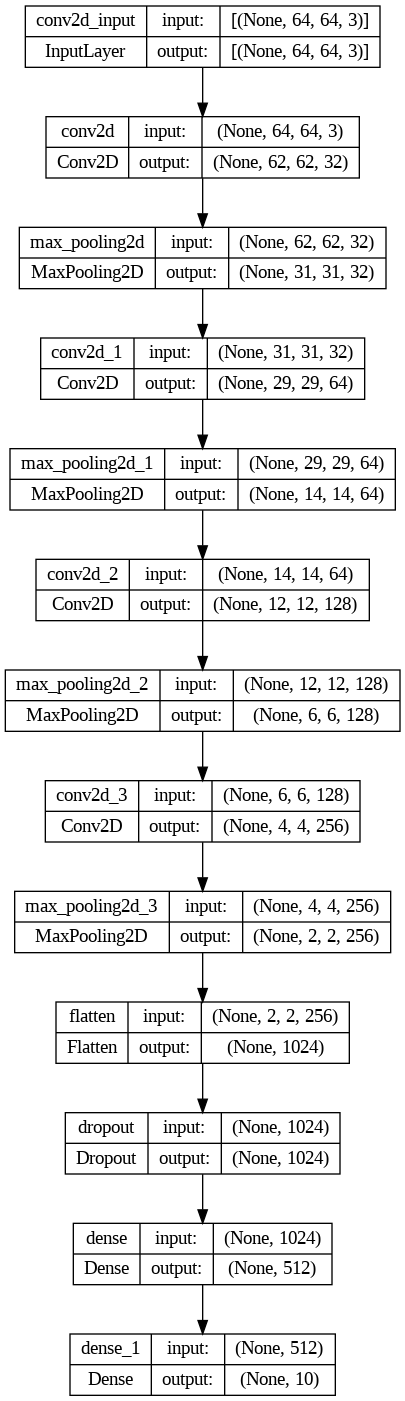

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 27787658 (106.00 MB)
Trainable params: 27734538 (105.80 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


1/1 [==============================] - 3s 3s/step


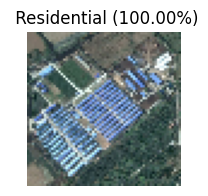

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


labels = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "PermanentCrop", "Residential", "River", "SeaLake"]

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

path = "/content/drive/MyDrive/Colab Notebooks/TESTING EXTERN/industrial_120.jpg"
img = preprocess_image(path)


predictions = model.predict(img)
predicted_class_index = np.argmax(predictions)
predicted_class_probability = predictions[0][predicted_class_index] * 100
predicted_class = labels[predicted_class_index]

original_img = image.load_img(path, target_size=(64, 64))

plt.figure(figsize=(2, 2))
plt.imshow(original_img)
plt.title(f" {predicted_class} ({predicted_class_probability:.2f}%)")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 90ms/step


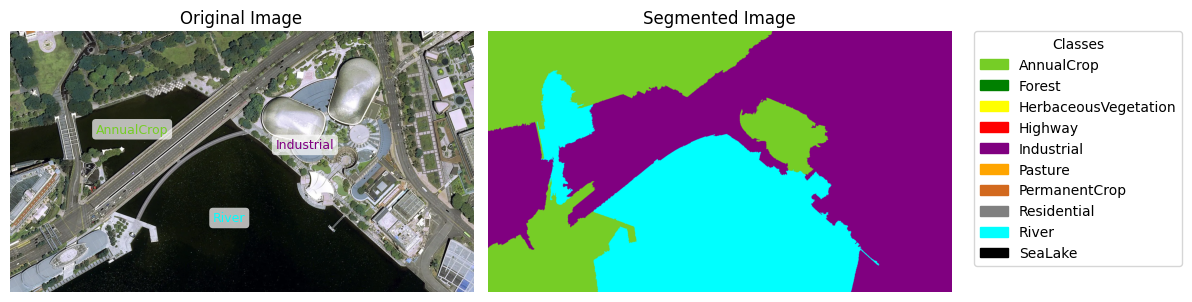

AnnualCrop: 504176 pixels
Industrial: 983949 pixels
River: 585475 pixels


In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from skimage.segmentation import slic
from collections import Counter
import cv2

# Load your pre-trained model
model = load_model("/content/drive/MyDrive/Colab Notebooks/MyModels/model.h5")

# List of class labels and colors
labels = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "PermanentCrop", "Residential", "River", "SeaLake"]
class_colors = {
    "AnnualCrop": [118, 205, 38], # GREEN APPLE
    "Forest": [0, 128, 0], # Green
    "HerbaceousVegetation": [255, 255, 0], # Yellow
    "Highway": [255, 0, 0], # Red
    "Industrial": [128, 0, 128], # Purple
    "Pasture": [255, 165, 0], # Orange
    "PermanentCrop": [210, 105, 30], # Chocolate
    "Residential": [128, 128, 128], # Gray
    "River": [0, 255, 255], # Cyan
    "SeaLake": [0, 0, 0] # Black
}

def preprocess_image(image_path, target_size=(64, 64)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    return img_array

def classify_patches(img_array, patch_size=16):
    height, width, _ = img_array.shape
    patch_predictions = np.zeros((height, width), dtype=np.int32)

    for i in range(0, height, patch_size):
        for j in range(0, width, patch_size):
            patch = img_array[i:i+patch_size, j:j+patch_size]
            if patch.shape[0] != patch_size or patch.shape[1] != patch_size:
                continue  # Skip patches that are not the right size

            patch = image.array_to_img(patch).resize((64, 64))
            patch = image.img_to_array(patch)
            patch = np.expand_dims(patch, axis=0)
            predictions = model.predict(patch)
            predicted_class_index = np.argmax(predictions)
            patch_predictions[i:i+patch_size, j:j+patch_size] = predicted_class_index

    return patch_predictions

def segment_and_merge(image, patch_predictions, original_img_shape):
    resized_patch_predictions = np.zeros(original_img_shape[:2], dtype=np.int32)
    height_ratio = original_img_shape[0] / patch_predictions.shape[0]
    width_ratio = original_img_shape[1] / patch_predictions.shape[1]

    for i in range(original_img_shape[0]):
        for j in range(original_img_shape[1]):
            resized_patch_predictions[i, j] = patch_predictions[int(i / height_ratio), int(j / width_ratio)]

    segments = slic(image, n_segments=100, compactness=10)
    merged_segments = np.zeros_like(segments)

    for seg_val in np.unique(segments):
        mask = (segments == seg_val)
        class_indices, counts = np.unique(resized_patch_predictions[mask], return_counts=True)
        majority_class_index = class_indices[np.argmax(counts)]
        merged_segments[mask] = majority_class_index

    return merged_segments

def plot_results(original_img, merged_segments):
    original_img_array = np.array(original_img)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.axis('off')
    plt.title("Original Image")

    for seg_val in np.unique(merged_segments):
        mask = (merged_segments == seg_val)
        y, x = np.mean(np.argwhere(mask), axis=0)
        class_label = labels[int(seg_val)]
        color = np.array(class_colors[class_label]) / 255

        plt.text(
            x, y, class_label,
            ha='center', va='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'),
            fontsize=9, color=color
        )

    segmented_image = np.array([class_colors[labels[int(val)]] for val in np.ravel(merged_segments)], dtype=np.uint8)
    segmented_image = segmented_image.reshape((*merged_segments.shape, 3))

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title("Segmented Image")
    plt.axis('off')

    legend_patches = [Patch(color=np.array(color)/255, label=label) for label, color in class_colors.items()]
    plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., title="Classes")

    plt.tight_layout()
    plt.show()

    counts = Counter(np.ravel(merged_segments))
    for class_index, count in counts.items():
        print(f"{labels[int(class_index)]}: {count} pixels")

# Path to your image
image_path = "/content/test.png"

# Preprocess image
img_array = preprocess_image(image_path)

# Classify patches
patch_predictions = classify_patches(img_array, patch_size=16)

# Segment and merge
original_img = image.load_img(image_path)
original_img_array = image.img_to_array(original_img) / 255.0
merged_segments = segment_and_merge(original_img_array, patch_predictions, original_img_array.shape)

# Plot results
plot_results(original_img, merged_segments)


138/138 [==============================] - 6s 21ms/step


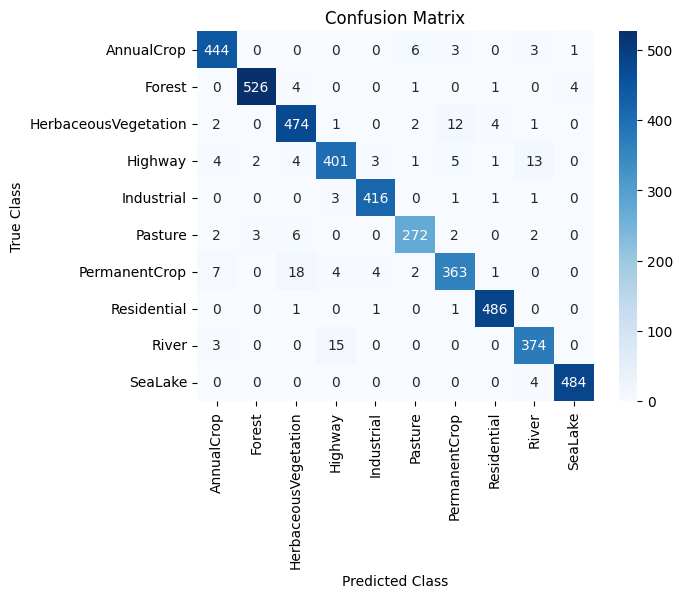

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

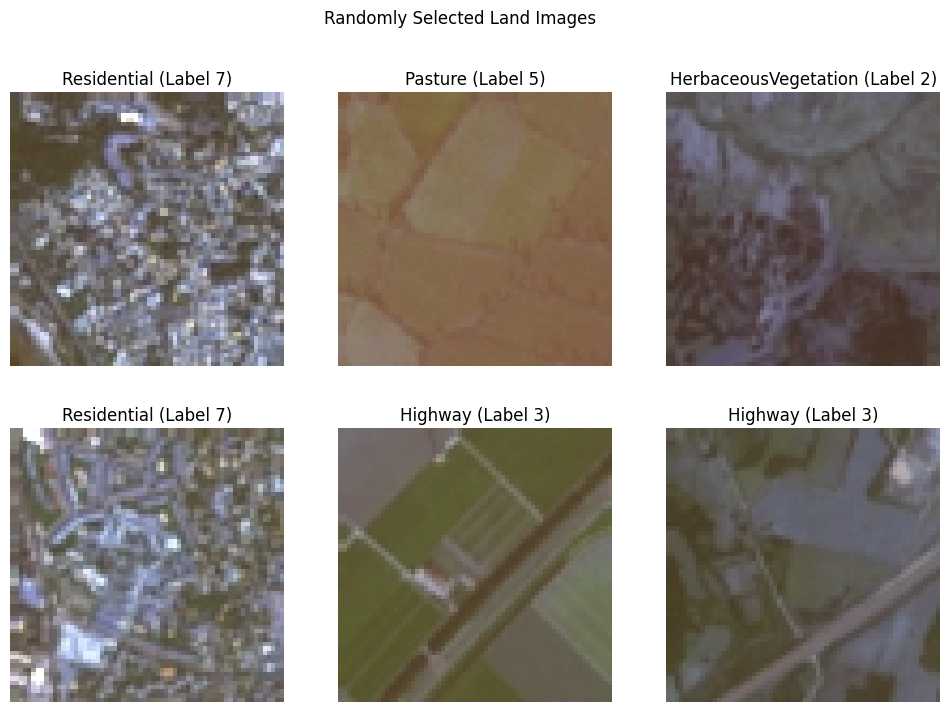

In [ ]:
import random
types = {'AnnualCrop': 0,
         'Forest': 1,
          'HerbaceousVegetation': 2,
          'Highway': 3,
          'Industrial': 4,
          'Pasture': 5,
          'PermanentCrop': 6,
          'Residential': 7,
          'River': 8,
          'SeaLake': 9,
          }

image_files = []
for root, dirs, files in os.walk(src_path):
    for file in files:
        if file.endswith(".jpg"):
            image_files.append((os.path.join(root, file), os.path.basename(root)))

random_images = random.sample(image_files, 6)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Randomly Selected Land Images')

for i, (image_file, land_name) in enumerate(random_images):
    img_array = cv2.imread(image_file, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (64, 64))

    row_index = i // 3
    col_index = i % 3

    label_number = types[land_name]
    axes[row_index, col_index].imshow(new_array,  cmap=None)
    axes[row_index, col_index].set_title(f'{land_name} (Label {label_number})')
    axes[row_index, col_index].axis('off')

plt.show()